Этот ноутбук предназначен для анализа временных рядов с целью классификации их на два класса.
Будут выполнены следующие задачи:
1. Вычисление трендов и обнаружение выбросов.
2. Визуализация распределения трендов и количества выбросов.
3. Визуализация временных рядов для случайных образцов.
4. Исследование распределения классов.
5. Вычисление основных статистических характеристик.
6. Анализ сезонных паттернов.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_parquet('train.parquet')

In [ ]:
def compute_trend(series):
    x = np.arange(len(series))
    return np.polyfit(x, series, 1)[0]

def detect_outliers(series, threshold=3):
    mean = np.mean(series)
    std_dev = np.std(series)
    return [1 if np.abs(x - mean) > threshold * std_dev else 0 for x in series]

train['trend'] = train['values'].apply(compute_trend)
train['num_outliers'] = train['values'].apply(lambda x: sum(detect_outliers(x)))

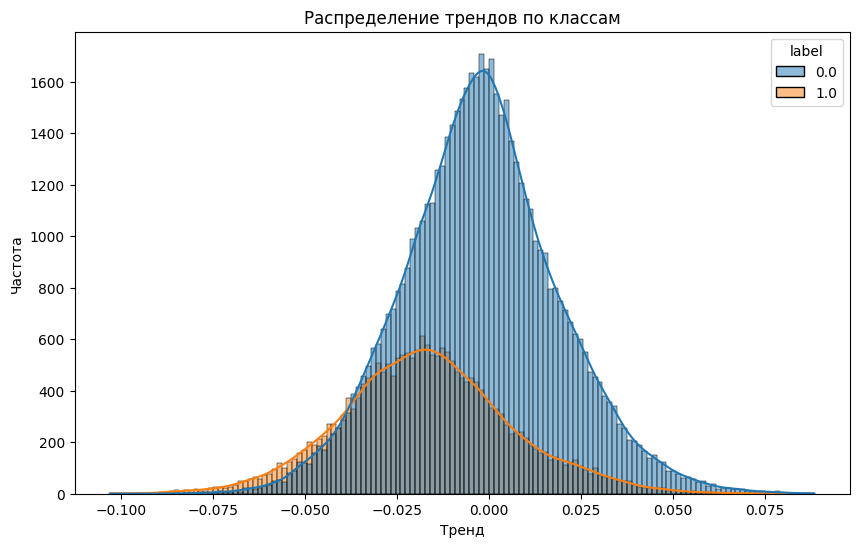

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='trend', hue='label', kde=True)
plt.title('Распределение трендов по классам')
plt.xlabel('Тренд')
plt.ylabel('Частота')
plt.show()

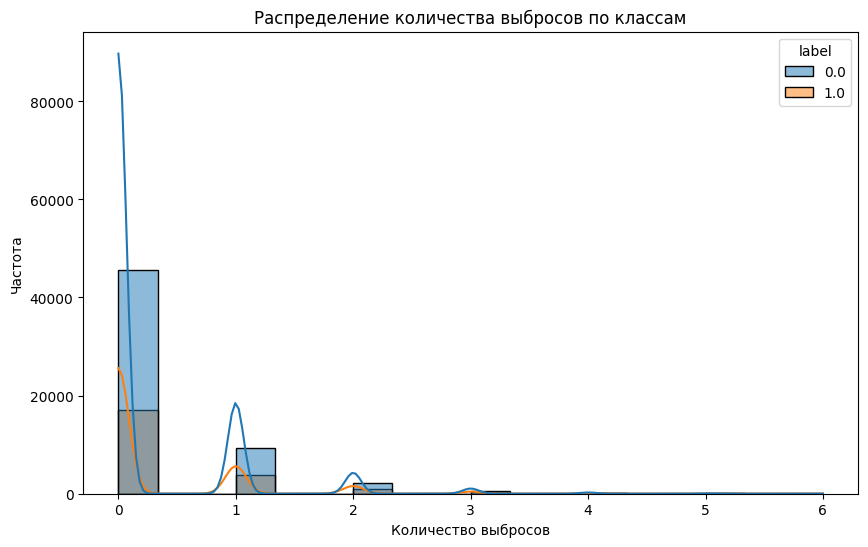

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='num_outliers', hue='label', kde=True)
plt.title('Распределение количества выбросов по классам')
plt.xlabel('Количество выбросов')
plt.ylabel('Частота')
plt.show()

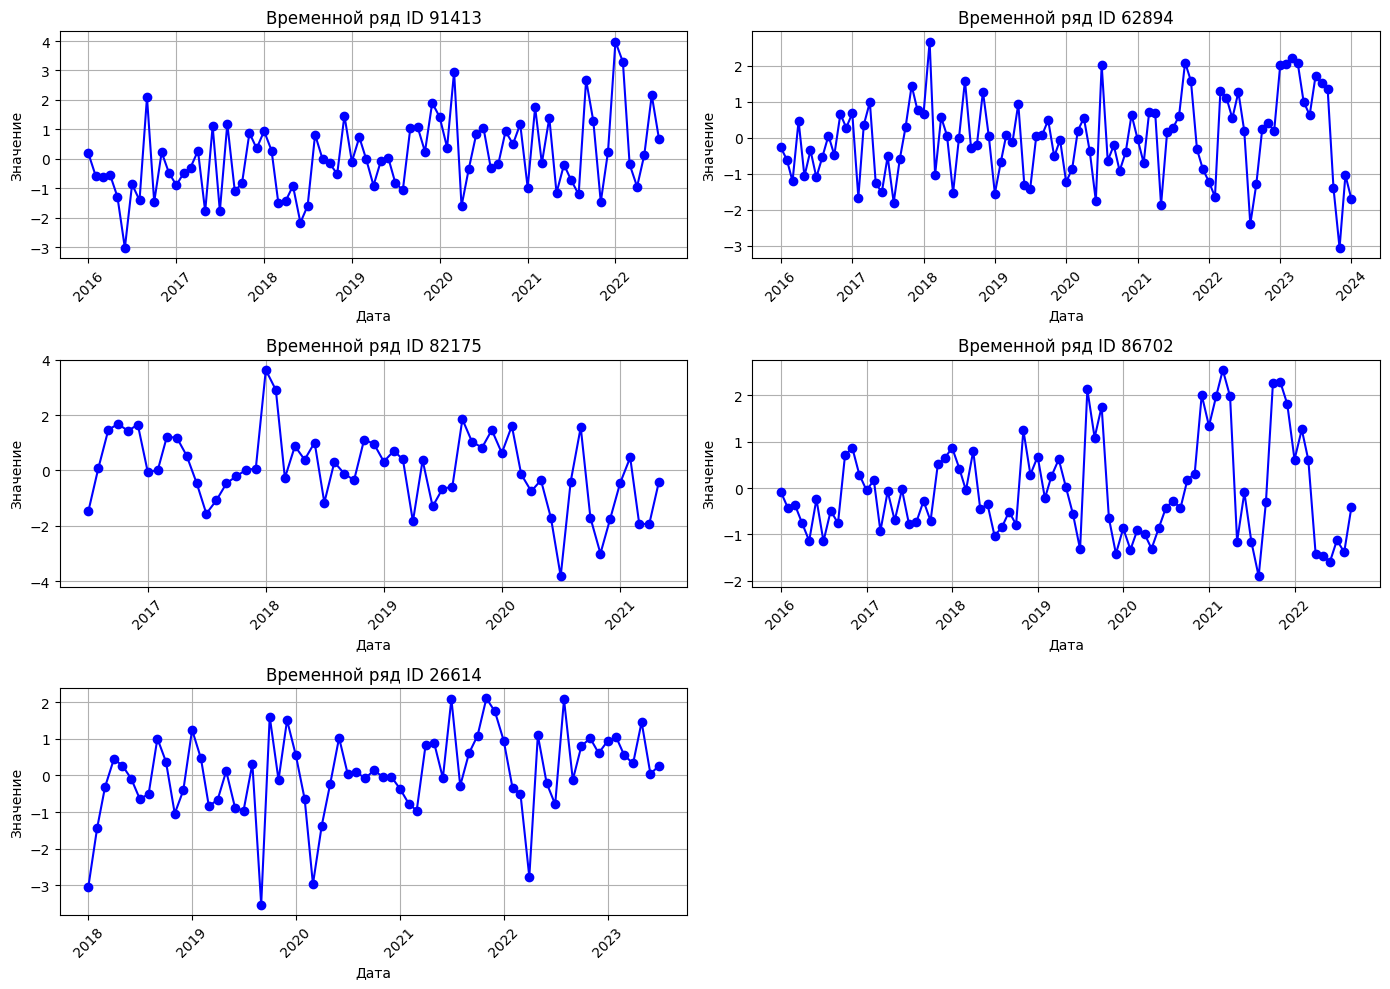

In [ ]:
sample_ids = train['id'].sample(5)
plt.figure(figsize=(14, 10))

for i, sample_id in enumerate(sample_ids, 1):
    plt.subplot(3, 2, i)
    sample_series = train[train['id'] == sample_id]['values'].values[0]
    dates = pd.to_datetime(train[train['id'] == sample_id]['dates'].values[0])

    plt.plot(dates, sample_series, marker='o', linestyle='-', color='b')
    plt.title(f'Временной ряд ID {sample_id}')
    plt.xlabel('Дата')
    plt.ylabel('Значение')
    plt.xticks(rotation=45)
    plt.grid(True)

plt.tight_layout()
plt.show()

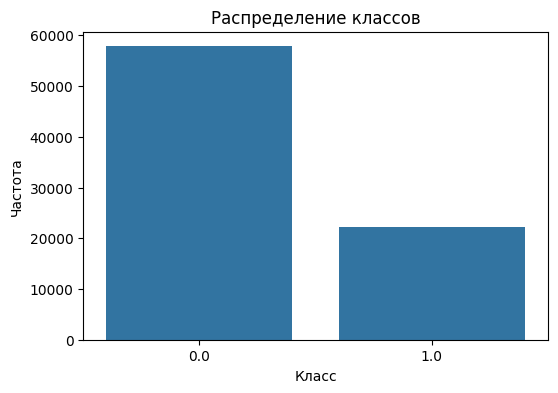

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='label')
plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.show()

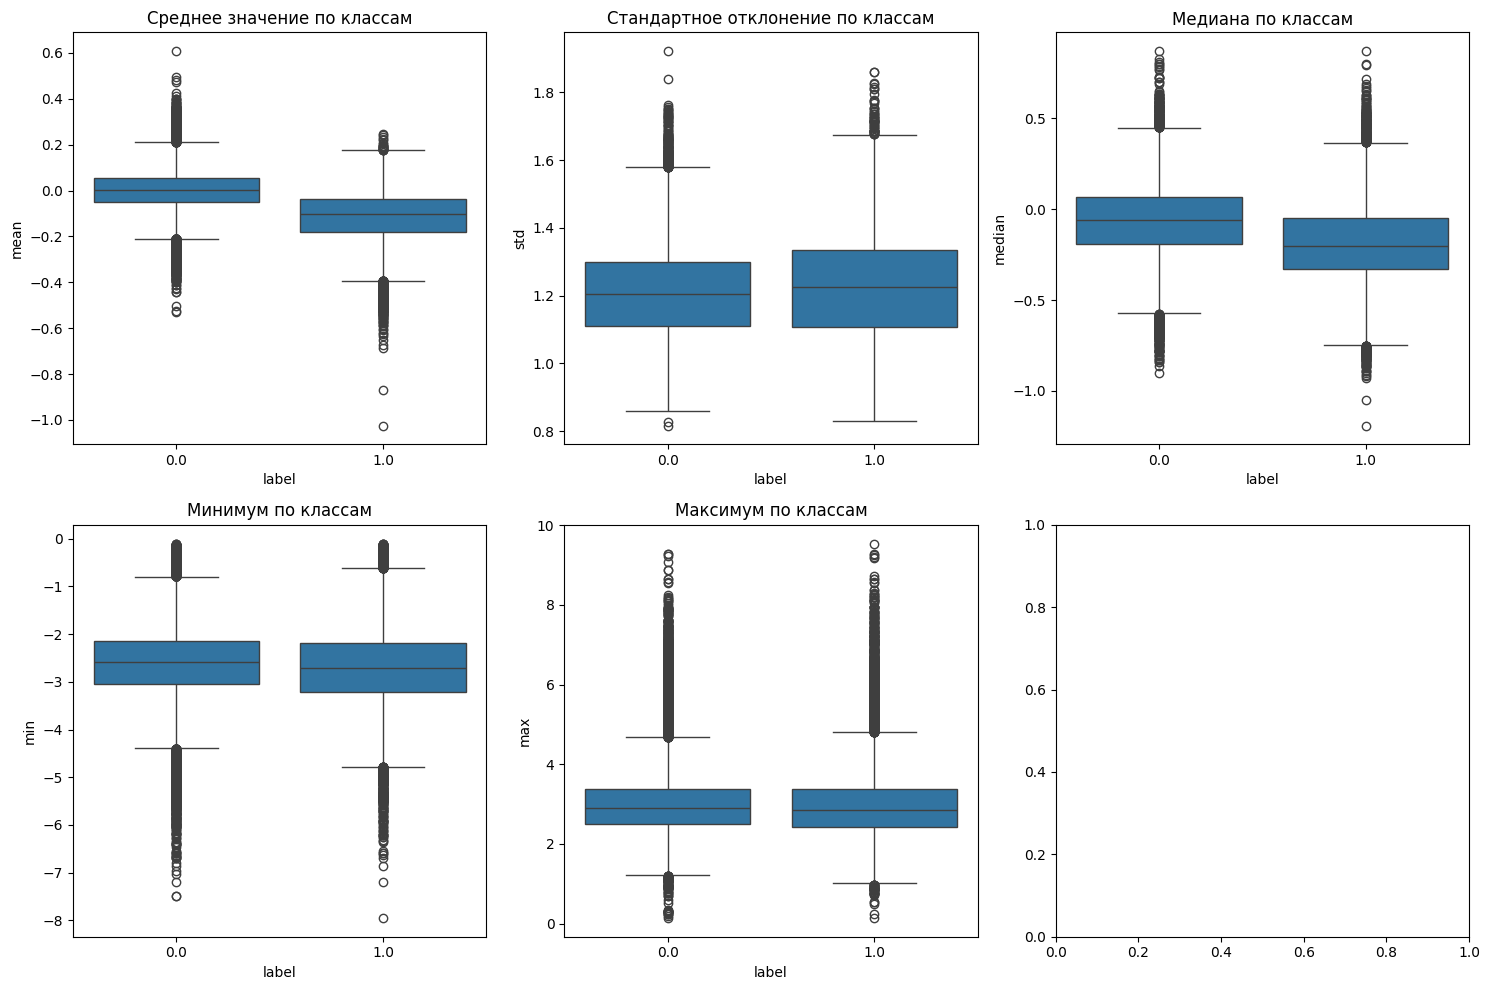

In [ ]:
train['mean'] = train['values'].apply(np.mean)
train['std'] = train['values'].apply(np.std)
train['median'] = train['values'].apply(np.median)
train['min'] = train['values'].apply(np.min)
train['max'] = train['values'].apply(np.max)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=train, x='label', y='mean', ax=axes[0, 0])
sns.boxplot(data=train, x='label', y='std', ax=axes[0, 1])
sns.boxplot(data=train, x='label', y='median', ax=axes[0, 2])
sns.boxplot(data=train, x='label', y='min', ax=axes[1, 0])
sns.boxplot(data=train, x='label', y='max', ax=axes[1, 1])

axes[0, 0].set_title('Среднее значение по классам')
axes[0, 1].set_title('Стандартное отклонение по классам')
axes[0, 2].set_title('Медиана по классам')
axes[1, 0].set_title('Минимум по классам')
axes[1, 1].set_title('Максимум по классам')

plt.tight_layout()
plt.show()

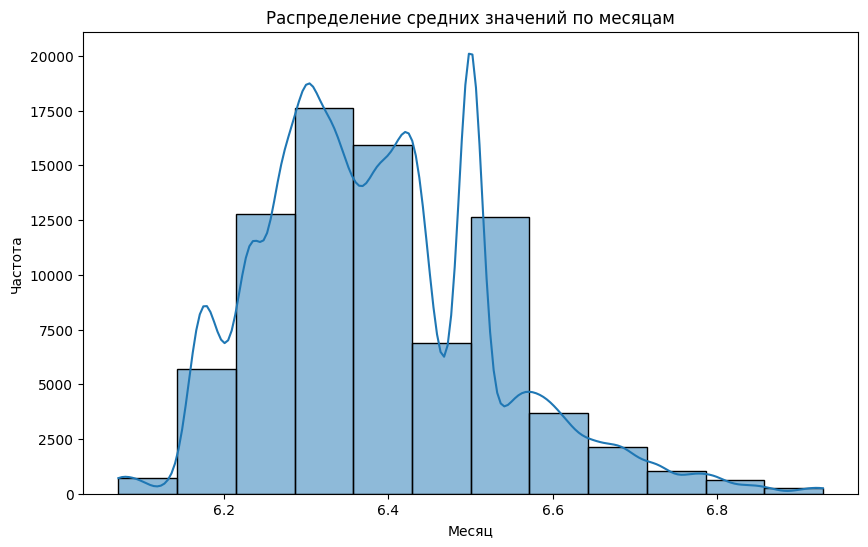

In [ ]:
train['dates'] = train['dates'].apply(pd.to_datetime)
train['month'] = train['dates'].apply(lambda dates: [date.month for date in dates])

monthly_means = train['month'].apply(lambda months: np.mean(months))

plt.figure(figsize=(10, 6))
sns.histplot(monthly_means, bins=12, kde=True)
plt.title('Распределение средних значений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Частота')
plt.show()